In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import patsy
import scipy.stats as stats

import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
%matplotlib inline

In [23]:
book_movie = pd.read_csv('book_movie_database.csv')

In [24]:
book_movie.shape

(692, 10)

In [25]:
book_movie.dtypes

book_title               object
book_rating             float64
book_number_ratings       int64
book_year_published     float64
popularity              float64
release_date             object
movie_runtime             int64
movie_rating            float64
movie_number_ratings      int64
genres                   object
dtype: object

In [26]:
#Getting genres as columns to expand the dataframe.

g = book_movie['genres']
from ast import literal_eval
g = g.apply(literal_eval)

In [27]:
g.iloc[200:240]

200    [{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...
201    [{'id': 9648, 'name': 'Mystery'}, {'id': 18, '...
202    [{'id': 27, 'name': 'Horror'}, {'id': 53, 'nam...
203    [{'id': 80, 'name': 'Crime'}, {'id': 18, 'name...
204    [{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...
205    [{'id': 12, 'name': 'Adventure'}, {'id': 10751...
206    [{'id': 27, 'name': 'Horror'}, {'id': 9648, 'n...
207    [{'id': 18, 'name': 'Drama'}, {'id': 27, 'name...
208    [{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...
209    [{'id': 10749, 'name': 'Romance'}, {'id': 18, ...
210                       [{'id': 35, 'name': 'Comedy'}]
211    [{'id': 18, 'name': 'Drama'}, {'id': 35, 'name...
212    [{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...
213    [{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...
214    [{'id': 28, 'name': 'Action'}, {'id': 14, 'nam...
215                        [{'id': 18, 'name': 'Drama'}]
216    [{'id': 18, 'name': 'Drama'}, {'id': 53, 'name...
217                        [{'i

In [28]:
genre1 = []
for i, name in enumerate(d[0]['name'] for d in g): 
    genre1.append(name)

In [29]:
book_movie['main_genre'] = genre1

In [30]:
book_movie['main_genre'].value_counts()

Drama              303
Comedy              76
Adventure           67
Crime               34
Action              31
Fantasy             25
Family              24
Horror              24
Romance             24
Animation           21
Thriller            15
Science Fiction     14
TV Movie            12
Mystery             11
Western              4
History              3
War                  2
Documentary          1
Music                1
Name: main_genre, dtype: int64

In [31]:
dummy = pd.get_dummies(book_movie['main_genre'])
dummy.head()

,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western
0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [32]:
book_movie = pd.concat([book_movie, dummy], axis = 1)

In [33]:
book_movie.head()

,book_title,book_rating,book_number_ratings,book_year_published,popularity,release_date,movie_runtime,movie_rating,movie_number_ratings,genres,...,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western
0,Halloween III: Season of the Witch,3.64,209,1982.0,6.07,10/22/82,98,5.0,232,"[{'id': 27, 'name': 'Horror'}, {'id': 9648, 'n...",...,0,1,0,0,0,0,0,0,0,0
1,Open Range,3.96,315,1990.0,16.53,8/29/03,139,7.0,268,"[{'id': 37, 'name': 'Western'}]",...,0,0,0,0,0,0,0,0,0,1
2,Mermaids,3.70,579,1986.0,5.55,12/14/90,110,6.5,124,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",...,0,0,0,0,0,0,0,0,0,0
3,The Company You Keep,3.64,641,2003.0,5.37,9/6/12,121,5.9,261,"[{'id': 18, 'name': 'Drama'}, {'id': 53, 'name...",...,0,0,0,0,0,0,0,0,0,0
4,Mr. Blandings Builds His Dream House,3.79,659,1946.0,2.74,6/4/48,94,7.2,43,"[{'id': 35, 'name': 'Comedy'}, {'id': 10749, '...",...,0,0,0,0,0,0,0,0,0,0


To begin, visualize the data:

In [35]:
book_movie.columns

Index(['book_title', 'book_rating', 'book_number_ratings',
       'book_year_published', 'popularity', 'release_date', 'movie_runtime',
       'movie_rating', 'movie_number_ratings', 'genres', 'main_genre',
       'Action', 'Adventure', 'Animation', 'Comedy', 'Crime', 'Documentary',
       'Drama', 'Family', 'Fantasy', 'History', 'Horror', 'Music', 'Mystery',
       'Romance', 'Science Fiction', 'TV Movie', 'Thriller', 'War', 'Western'],
      dtype='object')

In [36]:
book_movie.corr()

,book_rating,book_number_ratings,book_year_published,popularity,movie_runtime,movie_rating,movie_number_ratings,Action,Adventure,Animation,...,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western
book_rating,1.000000,0.237532,0.024557,0.082068,0.001495,0.255455,0.200784,0.031607,0.093505,0.154533,...,0.027854,-0.060805,-0.033167,-0.056047,-0.050110,0.048458,-0.014382,-0.030784,-0.010486,0.005799
book_number_ratings,0.237532,1.000000,-0.063259,0.183304,0.119640,0.111955,0.341852,-0.032647,0.102265,-0.012899,...,-0.013707,-0.047560,-0.019816,0.010913,-0.019466,0.106302,0.025852,0.056823,-0.024293,-0.040964
book_year_published,0.024557,-0.063259,1.000000,0.249950,-0.099432,0.028697,0.212706,-0.005513,0.011237,-0.008233,...,-0.097302,0.048636,0.010997,0.067846,0.035254,0.044633,-0.059642,0.022811,-0.091328,0.007576
popularity,0.082068,0.183304,0.249950,1.000000,0.093390,0.258327,0.685483,0.033596,0.125134,0.011160,...,-0.000495,0.001068,-0.025317,0.137421,-0.033089,0.015670,-0.081238,0.004925,-0.026073,0.034946
movie_runtime,0.001495,0.119640,-0.099432,0.093390,1.000000,0.156575,0.126660,-0.064728,0.011372,-0.205823,...,0.002843,-0.067702,0.012283,-0.026493,0.030264,-0.008168,-0.043491,-0.009938,0.111113,-0.004419
movie_rating,0.255455,0.111955,0.028697,0.258327,0.156575,1.000000,0.310184,-0.075331,-0.007799,0.023672,...,0.009526,-0.042666,0.011114,0.025605,-0.004149,-0.000112,-0.114565,-0.077501,-0.011124,0.049743
movie_number_ratings,0.200784,0.341852,0.212706,0.685483,0.126660,0.310184,1.000000,0.038926,0.168847,0.012229,...,-0.019182,0.004203,-0.018512,0.040106,-0.018803,0.096739,-0.065988,0.008162,-0.024207,-0.025589
Action,0.031607,-0.032647,-0.005513,0.033596,-0.064728,-0.075331,0.038926,1.000000,-0.070905,-0.038311,...,-0.014290,-0.041049,-0.008238,-0.027523,-0.041049,-0.031119,-0.028768,-0.032235,-0.011659,-0.016513
Adventure,0.093505,0.102265,0.011237,0.125134,0.011372,-0.007799,0.168847,-0.070905,1.000000,-0.057922,...,-0.021605,-0.062060,-0.012455,-0.041612,-0.062060,-0.047049,-0.043494,-0.048736,-0.017627,-0.024965
Animation,0.154533,-0.012899,-0.008233,0.011160,-0.205823,0.023672,0.012229,-0.038311,-0.057922,1.000000,...,-0.011673,-0.033532,-0.006730,-0.022484,-0.033532,-0.025421,-0.023501,-0.026333,-0.009524,-0.013489


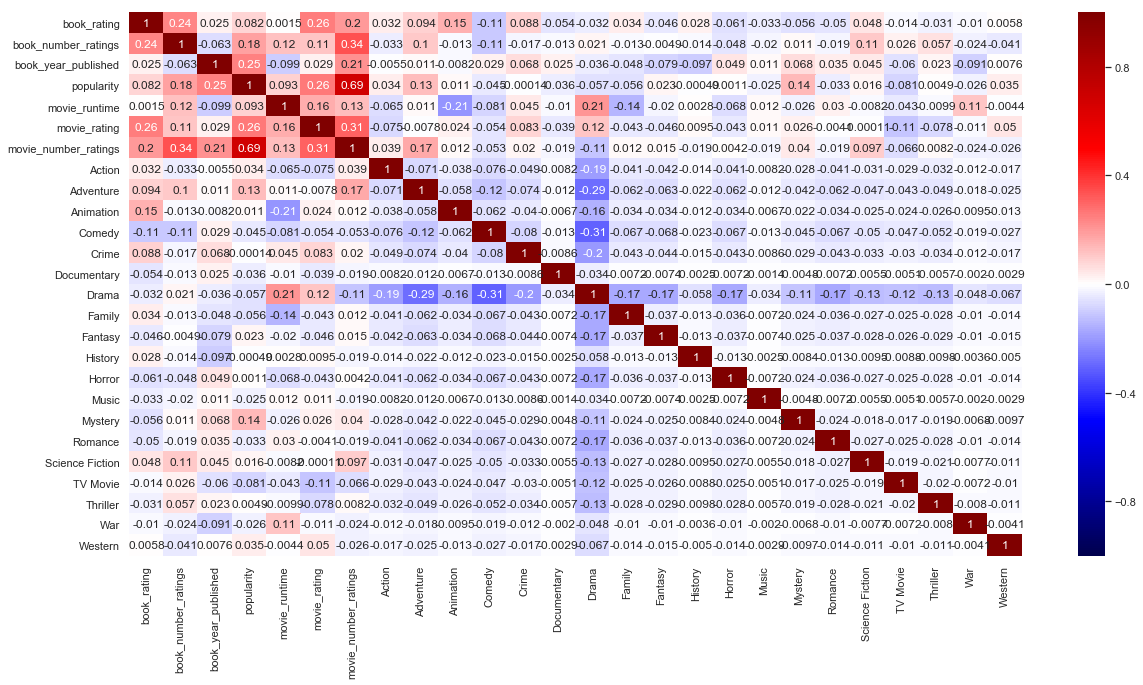

In [37]:
sns.set(font_scale=1) 
plt.figure(figsize=(20,10))
sns.heatmap(book_movie.corr(), cmap="seismic", annot=True, vmin=-1, vmax=1);

/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


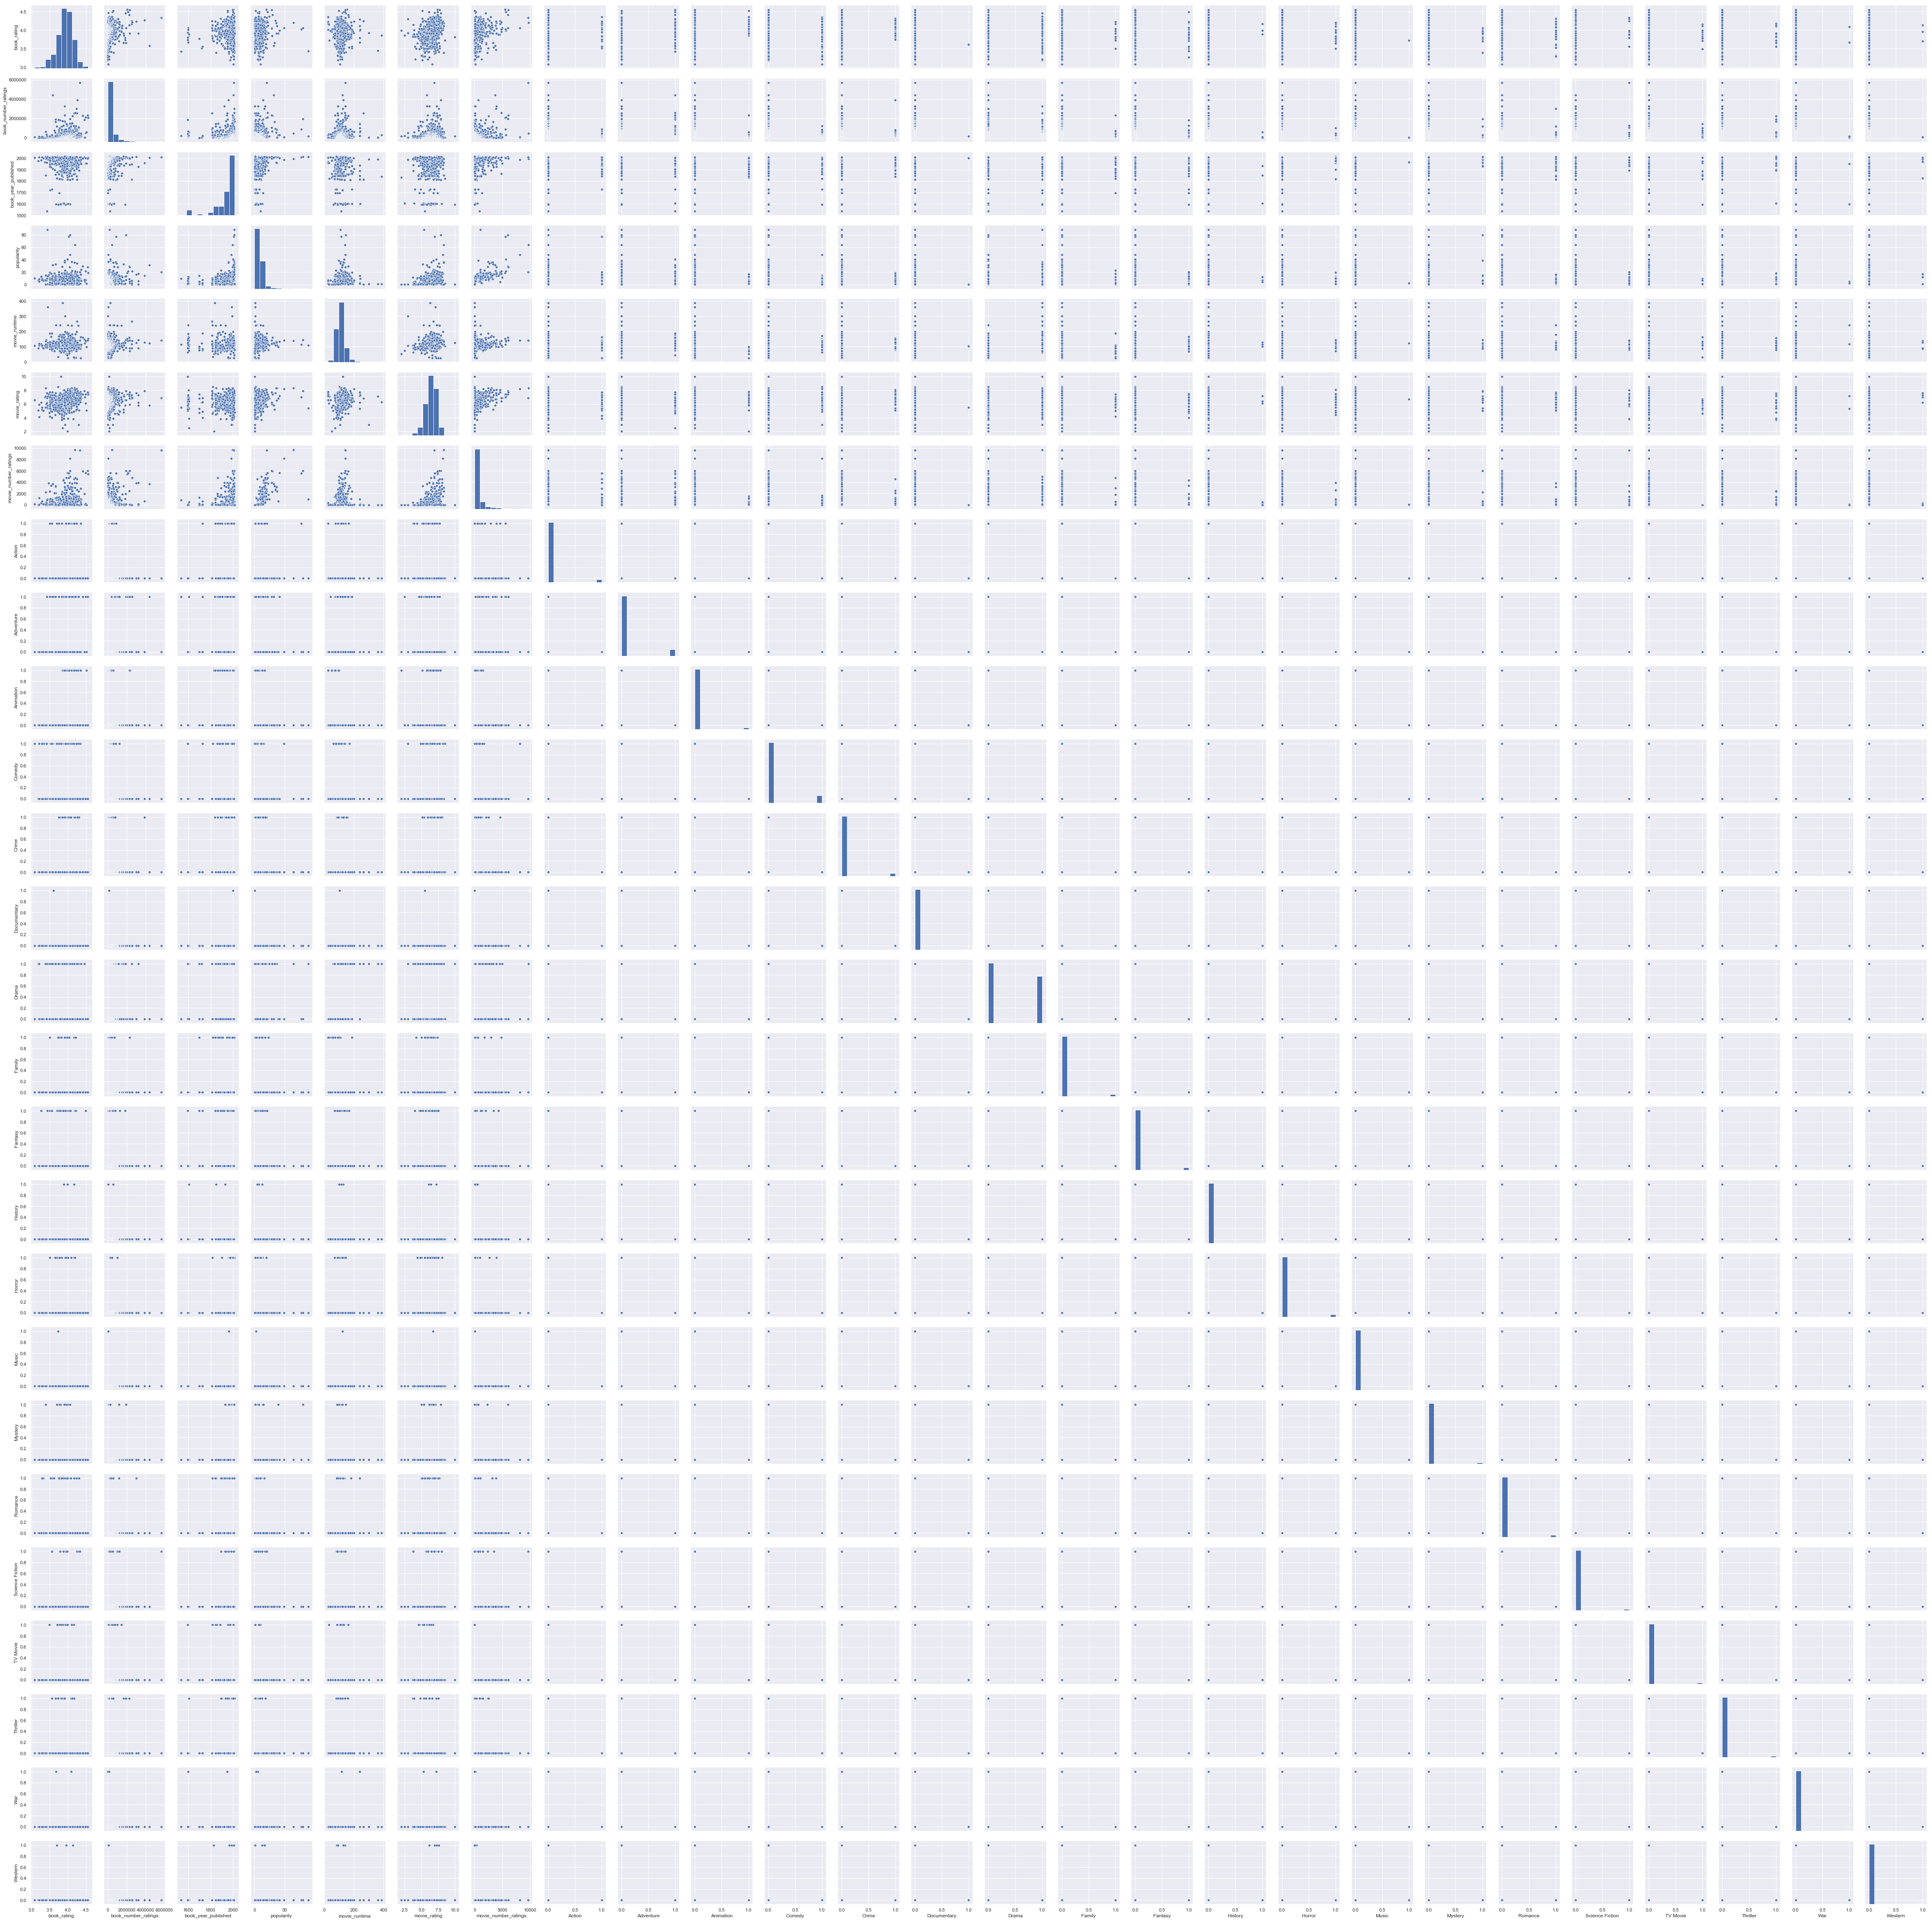

In [38]:
sns.pairplot(book_movie); #use log transformation for all the skewed features, using scaling for large-scale feature, standard scaler prefers normally distributed features.